# Train, Test and Save a Network

Notebook to generate and test a network based on specified learning parameters. This notebook uses data that was previously saved in `1 - Generate Data.ipynb`.

In [1]:
import sys
sys.path.append('../src')
import os
from classifier import Classifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from utils.mnist_reader import load_train_test_dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Load the previously generated and saved data

If this data does not exist, you need to run `1. Generate Data.ipynb`.

In [2]:
data_saved_dir = '../datasets/split_mnist_784_500_100'

x_train, y_train, x_test, y_test, data_params = load_train_test_dataset(data_saved_dir)

print('Test data loaded. Total of {} test examples.'.format(y_test.shape[0]))
data_params

Loading dataset from directory ../datasets/split_mnist_784_500_100. Current directory is /Users/katy/Code/NICE2025_SNN_CIL/examples.
Test data loaded. Total of 1000 test examples.


{'dataset': 'mnist_784',
 'trains_per_class': 500,
 'tests_per_class': 100,
 'trains_in_test_set': False,
 'training_labels': None,
 'testing_labels': None,
 'precision_required': 7,
 'shuffle': False,
 'use_edge_detection': False}

## Train and test the network

Generate a network and train and test it. 
There is the option to save the network and the recall results after this step. This will enable plots to be generated using `3 - Plot Saved Network`.

In [3]:
learning_params = {'learning_pool_size': 250,
                   'f_h_sparsity': 0.2,
                   'h_threshold_mean': 24,
                   'h_threshold_sd': 3.5,
                   'h_weights_init': 1.0,
                   'h_weights_p': 0.4,
                   'h_weights_d': 0.4,
                   'novelty_threshold': 50,
                   # This will be mult by the threshold to get the pre_synaptic weight total.
                   # ratio * threshold indicates the maximum voltage of a hidden neuron.
                   'noise_tolerance_ratio': 1.3,
                   'p_init': 0.5,
                   'p_potentiate': 0.2,
                   'p_deprecate': 0.02,
                   'p_mature_threshold': 1.0,
                   }
classifier = Classifier(learning_params, verbose=False)
labels_learnt = classifier.learn(x_train, y_train)
all_results = classifier.predict(x_test, y_test)

Classifier network defined as follows:

Learning params summary: 
{   'f_h_sparsity': 0.2,
    'h_threshold_mean': 24,
    'h_threshold_sd': 3.5,
    'h_weights_d': 0.4,
    'h_weights_init': 1.0,
    'h_weights_p': 0.4,
    'learning_pool_size': 250,
    'noise_tolerance_ratio': 1.3,
    'novelty_threshold': 50,
    'p_deprecate': 0.02,
    'p_init': 0.5,
    'p_mature_threshold': 1.0,
    'p_potentiate': 0.2}
Learning:
      Length of each signal:      784
      Number of training signals: 5000


Initialised subnetwork classification 0 for learning. Thresholds range from min 15.008720139590807 to maximum 33.725198095723954

 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 1

## Print the core results with a confusion matrix

In [4]:
predictions = all_results['predictions']
results = classification_report(y_true=y_test, y_pred=predictions, zero_division=0, output_dict=True)
results_dict = {'accuracy': results['accuracy'],
                'f1_score_macro': results['macro avg']['f1-score'],
                'f1_score_weighted': results['weighted avg']['f1-score'],
                'precision_weighted': results['weighted avg']['precision'],
                'recall_weighted': results['weighted avg']['recall'],
                }

In [5]:
print('Learning step data')
print('labels learnt: {}'.format(labels_learnt))
print(classifier.subnet_data())
print(classification_report(y_true=y_test, y_pred=predictions, zero_division=0, output_dict=True))
print('\nRecall for simulation: Overall accuracy: {} Precision: {},  Recall: {}'
      .format(results_dict['accuracy'],
              results_dict['precision_weighted'],
              results_dict['recall_weighted']))

Learning step data
labels learnt: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
  classification  h_permanent  h_refreshed  h_insufficient_conns  \
0              0         1067         1775                    34   
1              1          177         2953                    10   
2              2         1029         2041                     1   
3              3          859         2045                   965   
4              4          670         2266                   140   
5              5          661         2208                   237   
6              6          928         2183                   180   
7              7          419         2395                   137   
8              8         1078         2009                    50   
9              9          525         2112                   234   

   training samples  training samples contrib  training samples not novel  \
0               500                       286                         214   
1               500  

In [6]:
average_scores, average_spikes = classifier.get_predict_diagnostics(all_results)


Establishing averages
... done establishing averages


In [7]:
average_scores

,0,1,2,3,4,5,6,7,8,9,actual
0,98.81,2.77,13.88,14.42,8.65,43.20,20.93,12.17,9.26,9.74,0
1,0.10,29.91,1.92,3.10,0.72,1.15,1.16,2.34,3.33,1.96,1
2,6.84,12.92,50.27,13.01,8.40,5.91,12.48,10.01,16.59,8.33,2
3,10.81,7.57,11.12,57.17,6.63,26.74,6.27,9.01,24.76,14.14,3
4,2.60,3.97,6.67,4.00,51.52,4.71,8.88,19.53,8.72,26.55,4
5,12.19,4.56,6.72,14.48,4.47,36.33,8.97,5.83,13.26,8.02,5
6,19.96,6.14,28.54,5.42,26.90,15.94,90.85,7.31,17.48,14.90,6
7,1.54,2.13,2.33,1.46,8.18,2.34,1.05,37.70,2.38,11.31,7
8,16.70,19.16,22.70,36.44,19.13,36.56,12.29,20.41,70.59,28.32,8
9,5.92,6.95,6.72,8.63,36.31,12.55,7.80,38.86,18.40,55.14,9


In [8]:
average_spikes

208

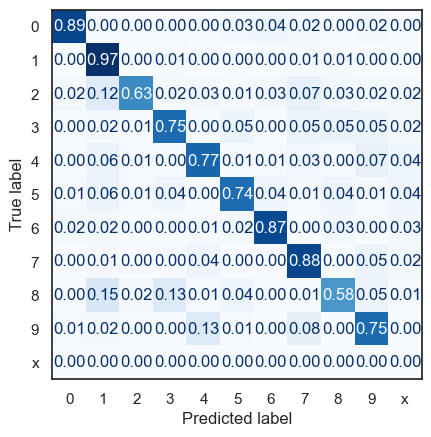

In [9]:

sns.set(font_scale = 1)
with sns.axes_style('white'):
    ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=predictions,
                                        labels=np.append(np.sort(labels_learnt), 'x'),
                                        normalize='true', values_format = '.2f', colorbar=False,
                                        cmap=plt.cm.Blues)
    
plt.show()
plt.close()

## Optional: Save the network

If you would like to plot the results or perform a new recall, save this network.

The network (with its saved recall results) can be re-established with the following code.

```
from classifier import Classifier

classifier, labels_learnt = Classifier.from_saved(networks_dir+os.sep+network_name, verbose=False)
all_results = classifier.get_last_predict_results()
```

In [11]:
from utils.file_handler import get_timestamp_str 
# Directory for loading and/or saving the network
networks_dir = '../simulation_results/paper_results/pre_trained_network_examples'
network_name = 'my_saved_network_'+get_timestamp_str()
classifier.save_network(networks_dir, network_name)

****** FUll file path for excel  ../simulation_results/paper_results/pre_trained_network_examples/my_saved_network_2025-02-13-17-31/network_description.xlsx
Network description saved to directory ../simulation_results/paper_results/pre_trained_network_examples/my_saved_network_2025-02-13-17-31


'../simulation_results/paper_results/pre_trained_network_examples/my_saved_network_2025-02-13-17-31'

## Plot details of the network

The notebook `3 - Plot Saved Network.ipynb` can be used to plot the network that you have just saved.